# Explore here

## Step 1: Problem statement and data collection¶

# The database is about diabetes, the main column is a binary column, with 0 for no diabetes, 1 for pre diabetes or diabetes, the rest is mostly health data about the patient and some non related information or so would it seem.
# First we will load the data, create the test and train, and then delete duplicates

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
file_path = '/workspaces/BakuDShaggy-EDA-mas-proyecto-final/data/raw/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)
print(f"Full dataset shape:{data.shape}")

Full dataset shape:(70692, 22)


In [3]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 80% train, 20% test
    random_state=42,
    stratify=y 
)
train_data = X_train.copy()
train_data['Diabetes_binary'] = y_train

test_data = X_test.copy()
test_data['Diabetes_binary'] = y_test

print(f"\nTrain shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")


Train shape: (56553, 22)
Test shape: (14139, 22)


In [5]:
# Check first few rows
print("\nFirst 3 rows of training data:")
print(train_data.head(3))

# Basic info
print("\nData types:")
print(train_data.dtypes)

# Check class balance
print("\nClass distribution:")
print(train_data['Diabetes_binary'].value_counts(normalize=True))

# Basic statistics
print("\nDescriptive statistics:")
print(train_data.describe())


First 3 rows of training data:
       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
47977     1.0       0.0        1.0  29.0     1.0     0.0   
2676      0.0       1.0        1.0  24.0     1.0     0.0   
35637     1.0       0.0        1.0  42.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
47977                   0.0           1.0     1.0      1.0  ...          0.0   
2676                    0.0           1.0     0.0      1.0  ...          0.0   
35637                   0.0           1.0     1.0      1.0  ...          0.0   

       GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
47977      2.0       0.0       0.0       0.0  1.0  10.0        6.0     8.0   
2676       3.0      15.0       6.0       0.0  0.0   7.0        5.0     1.0   
35637      3.0       0.0      10.0       1.0  0.0  11.0        5.0     4.0   

       Diabetes_binary  
47977              1.0  
2676               0.0  
35637             

In [6]:
print("\nMissing values in training set:")
print(train_data.isnull().sum().sort_values(ascending=False))

print("\nMissing values in test set:")
print(test_data.isnull().sum().sort_values(ascending=False))


Missing values in training set:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Missing values in test set:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth        

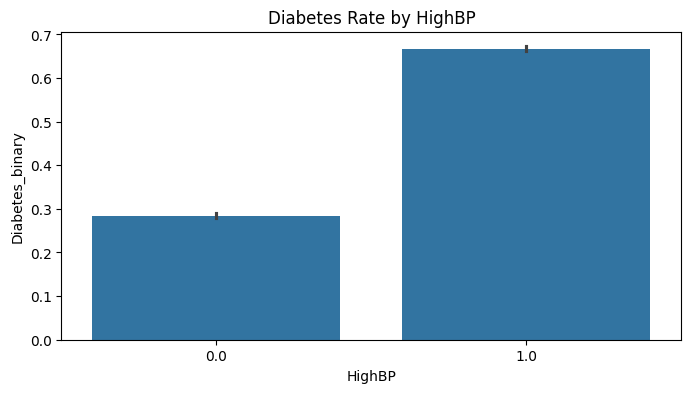

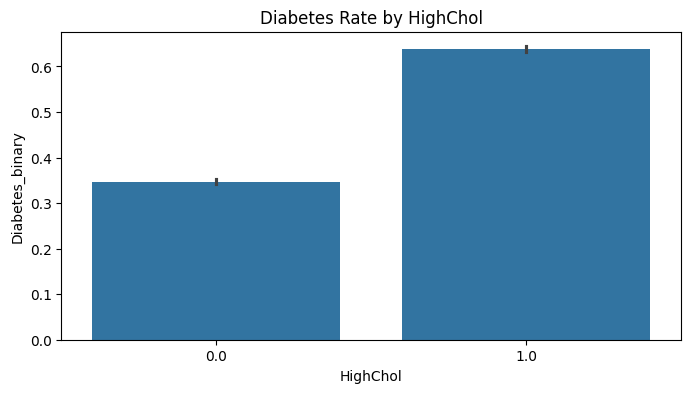

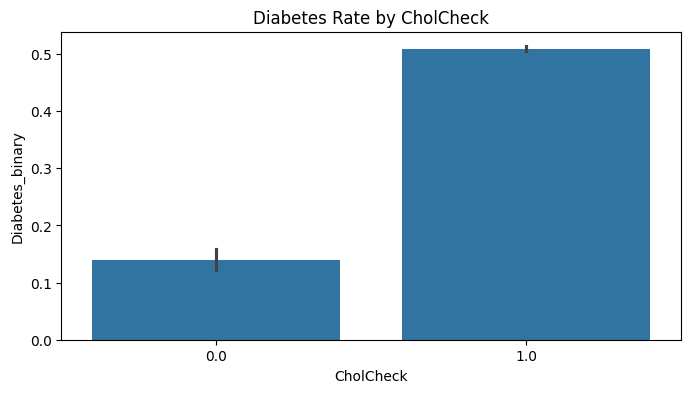

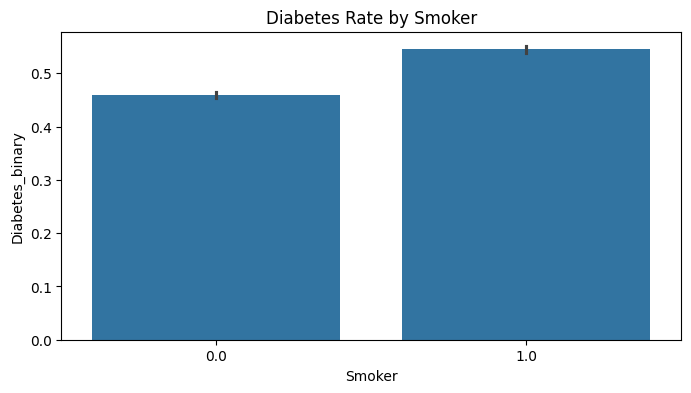

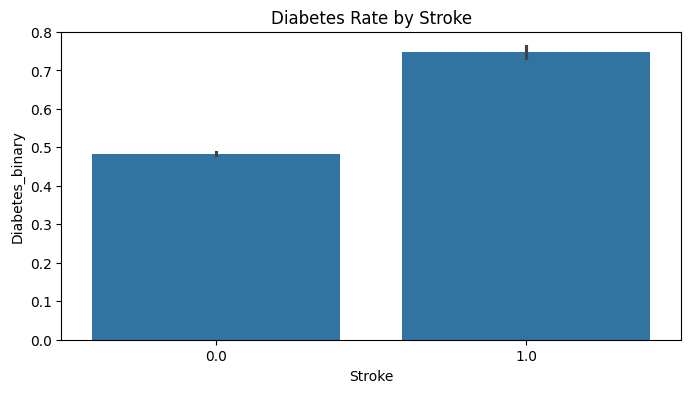

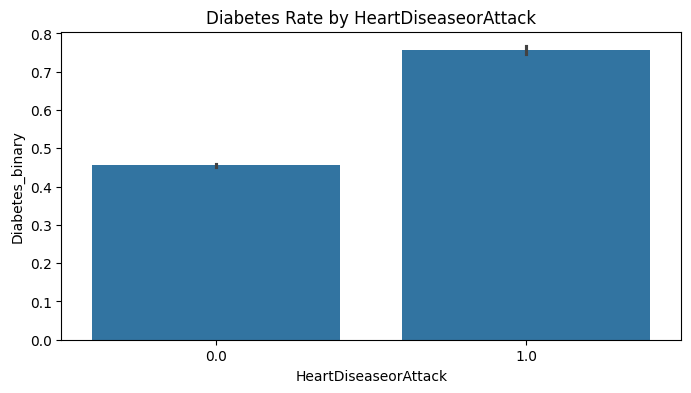

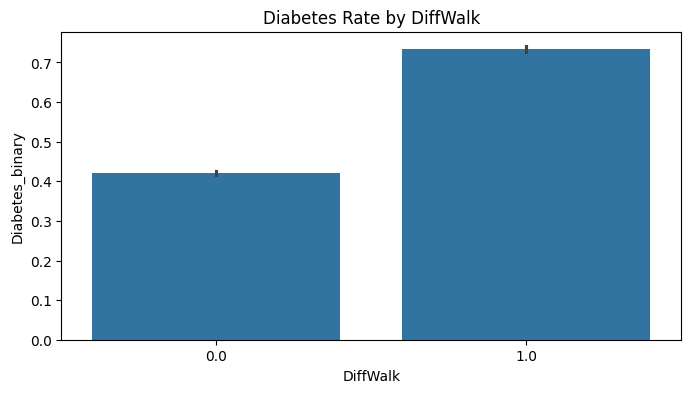

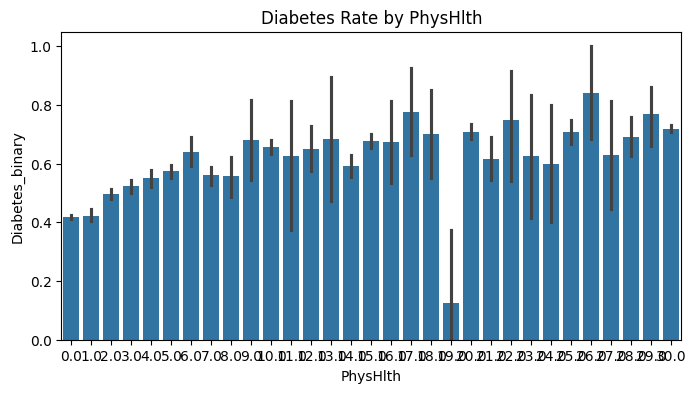

In [7]:
def plot_feature(feature):
    plt.figure(figsize=(8,4))
    sns.barplot(x=feature, y='Diabetes_binary', data=train_data)
    plt.title(f'Diabetes Rate by {feature}')
    plt.show()

plot_feature('HighBP')       
plot_feature('HighChol')     
plot_feature('CholCheck')
plot_feature('Smoker')
plot_feature('Stroke')
plot_feature('HeartDiseaseorAttack')
plot_feature('DiffWalk')
plot_feature('PhysHlth')
